Week 2: looked at how reviews change over time for top businesses, consider using different metrics for average stars, things like rolling average or the average for the last n period of time. 

In [1]:
import json
import pickle
import numpy as np
import matplotlib.pyplot as plt
import datetime as datetime

In [2]:
business_review_dict = pickle.load(open("business_reviews.pickle", "rb"))

In [3]:
datetime.datetime(2016, 12, 1)

datetime.datetime(2016, 12, 1, 0, 0)

In [11]:
relevant = {}
business_info = {}
with open("yelp_academic_dataset_business.json") as f:
    for line in f:
        json_line = json.loads(line)

        city = json_line["city"]
        business = json_line["business_id"]
        reviews = business_review_dict[business]
        num_reviews = len(reviews)
        avg_star = sum(reviews)/float(num_reviews)
        
        if city == "Phoenix":
            if num_reviews > 1500 and "Restaurants" in json_line["categories"]:
                print(json_line["name"])
                relevant[business] = []
                business_info[business] = json_line

{u'city': u'Tempe', u'neighborhood': u'', u'name': u'Innovative Vapors', u'business_id': u'0DI8Dt2PJp07XkVvIElIcQ', u'longitude': -111.936102, u'hours': [u'Monday 11:0-21:0', u'Tuesday 11:0-21:0', u'Wednesday 11:0-21:0', u'Thursday 11:0-21:0', u'Friday 11:0-22:0', u'Saturday 10:0-22:0', u'Sunday 11:0-18:0'], u'state': u'AZ', u'postal_code': u'85283', u'categories': [u'Tobacco Shops', u'Nightlife', u'Vape Shops', u'Shopping'], u'stars': 4.5, u'address': u'227 E Baseline Rd, Ste J2', u'latitude': 33.3782141, u'review_count': 17, u'attributes': [u'BikeParking: True', u'BusinessAcceptsBitcoin: False', u'BusinessAcceptsCreditCards: True', u"BusinessParking: {'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}", u'DogsAllowed: False', u'RestaurantsPriceRange2: 2', u'WheelchairAccessible: True'], u'type': u'business', u'is_open': 0}


In [8]:
with open("yelp_academic_dataset_review.json") as f:
    for line in f:
        json_line = json.loads(line)
        if json_line["business_id"] in relevant:
            relevant[json_line["business_id"]].append(json_line)

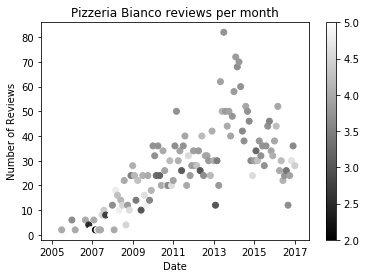

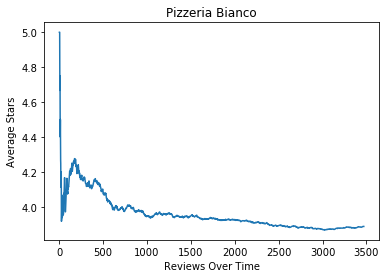

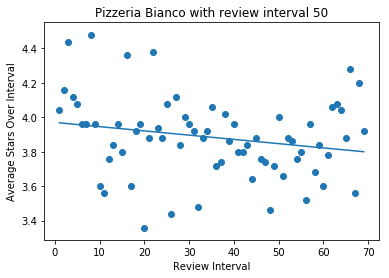

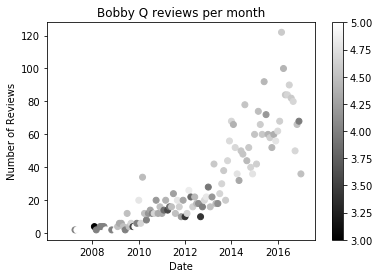

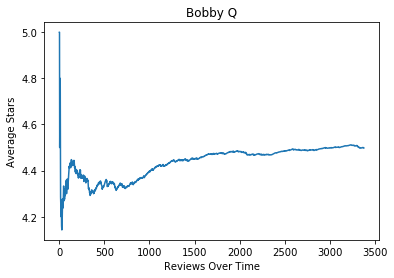

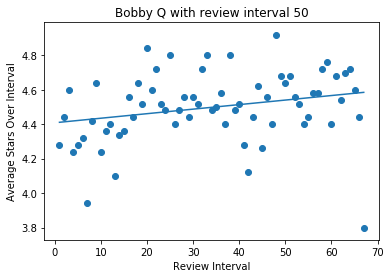

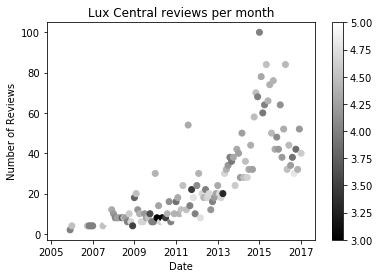

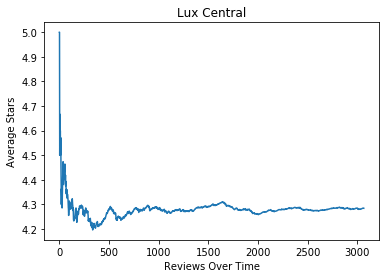

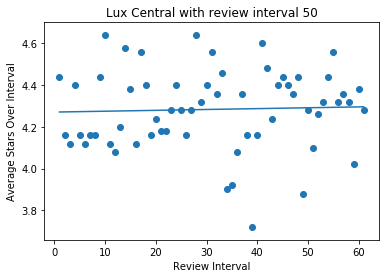

In [9]:
for b_id, reviews in relevant.items():
    counter = 0
    business = business_info[b_id]
    name = business["name"]
    sorted_reviews = sorted(reviews, key=lambda x: datetime.datetime.strptime(x['date'], '%Y-%m-%d'))
    seen_stars = []
    
    x = []
    avg = []
    
    x_interval = []
    avg_interval = []
    interval = 50
    
    date_to_count = {}
    date_to_reviews = {}
    for rev in sorted_reviews:
        date = datetime.datetime.strptime(rev['date'], '%Y-%m-%d')
        month = int(date.strftime('%m'))
        year = int(date.strftime('%Y'))
        if (year, month) in date_to_count:
            date_to_count[(year, month)] += 1
            date_to_reviews[(year, month)].append(rev["stars"])
        else:
            date_to_count[(year, month)] = 1
            date_to_reviews[(year, month)] = [rev["stars"]]
        
        counter += 1
        stars = rev["stars"]
        seen_stars.append(stars)
        x.append(len(seen_stars))
        avg.append(np.average(np.array(seen_stars)))
        
        if counter % interval == 0:
            x_interval.append(int(counter/interval))
            avg_int = np.average(np.array(seen_stars[-interval::]))
            avg_interval.append(avg_int)
    
    dates = []
    counts = []
    y = []
    for date, count in sorted(date_to_count.items(), key=lambda x:x[0]):
        formatted_date = datetime.datetime(date[0], date[1], 1)
        y.append(np.average(np.array(date_to_reviews[date])))
        dates.append(formatted_date)
        counts.append(count)
    sc = plt.scatter(dates, counts, c=y)
    plt.gray()
    plt.colorbar(sc)
    plt.title(name + " reviews per month")
    plt.xlabel("Date")
    plt.ylabel("Number of Reviews")
    plt.show()
            
    plt.plot(x, avg)
    plt.title(name)
    plt.xlabel("Reviews Over Time")
    plt.ylabel("Average Stars")
    plt.show()
    
    plt.scatter(x_interval, avg_interval)
    plt.plot(np.unique(x_interval), np.poly1d(np.polyfit(x_interval, avg_interval, 1))(np.unique(x_interval)))
    plt.title(name + " with review interval " + str(interval))
    plt.xlabel("Review Interval")
    plt.ylabel("Average Stars Over Interval")
    plt.show()

Week 3: Tried to create a new price metric from the $-$$$$ scales and words mentioned in the text. 

In [1]:
import json
import pickle
import numpy as np
from nltk.corpus import wordnet as wn
import re

In [2]:
counter = 0
total = 0
with open("yelp_academic_dataset_business.json") as f:
    for line in f:
        total += 1
        json_line = json.loads(line)
        if json_line["attributes"]:
            for att in json_line["attributes"]:
                m = re.match(r"RestaurantsPriceRange2:\s(\d)", att)
                if m:
                    counter += 1
print(counter, total)

(90300, 144072)


In [3]:
business_review_dict = pickle.load(open("business_reviews.pickle", "rb"))

In [4]:
businesses = {}
size = 10000
count = 0
with open("yelp_academic_dataset_business.json") as f:
    if count < size:
        count += 1
        for line in f:
            json_line = json.loads(line)
            cats = json_line["categories"]
            if cats and "Restaurants" in json_line["categories"]:
                bus = json_line["business_id"]
                businesses[bus] = [json_line, []]

In [5]:
with open("yelp_academic_dataset_review.json") as f:
    for line in f:
        json_line = json.loads(line)
        bus = json_line["business_id"]
        if bus in businesses:
            businesses[bus][1].append(json_line)

KeyboardInterrupt: 

In [ ]:
cheap_words = {"cheap", "inexpensive"}
exp_words = {"expensive", "pricy", "pricey", "costly"}

cheap_adj = {"low", "good", "fair"}
exp_adj = {"bad", "high", "poor"}


# for s in wn.synsets("costly", pos=wn.ADJ):
#     print (s, s.lemma_names())
    
sent_list = []    

for bus, (b_info, reviews) in businesses.items():
    total = len(reviews)
    cheap_count = 0
    exp_count = 0
    for review in reviews:
        text = review["text"].split()
        for ind, word in enumerate(text):
            if word == "price" and ind > 0:
                if text[ind - 1] in cheap_adj:
                    cheap_count += 1
                elif text[ind - 1] in exp_adj:
                    exp_count += 1
            elif word in cheap_words:
                if ind > 0 and text[ind - 1] == "not":
                    exp_count += 1
                else:
                    cheap_count += 1
            elif word in exp_words:
                if ind > 0 and text[ind - 1] == "not":
                    cheap_count += 1
                else:
                    exp_count += 1
    sent_list.append((b_info, total, cheap_count, exp_count))    

In [ ]:
dollar_dict = {1: 8.0, 2: 20.0, 3: 45.0, 4: 70.0}
range_dict = {1: 5.0, 2: 19.0, 3: 29.0, 4: 50.0}
for (b_info, total, cheap_count, exp_count) in sent_list[100:200]:
    if b_info["attributes"]:
        price = None
        for att in b_info["attributes"]:
            m = re.match(r"RestaurantsPriceRange2:\s(\d)", att)
            if m:
                price = int(m.group(1))
        if price:
            adjusted = dollar_dict[price] - range_dict[price]*float(cheap_count)/total + range_dict[price]*float(exp_count)/total
            print(price, adjusted, total, cheap_count, exp_count)

Week 4: look at votes over time and work on the ML implementation

other features: num fans, num friends, yelping since

In [6]:
import numpy as np
import json
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [7]:
with open("yelp_academic_dataset_user.json") as f:
    for l in f:
        line = json.loads(l)
        print(line.keys())
        break

[u'yelping_since', u'useful', u'compliment_photos', u'compliment_list', u'compliment_funny', u'funny', u'review_count', u'friends', u'fans', u'type', u'compliment_note', u'compliment_plain', u'compliment_writer', u'compliment_cute', u'average_stars', u'user_id', u'compliment_more', u'elite', u'compliment_hot', u'cool', u'name', u'compliment_profile', u'compliment_cool']


In [8]:
years_to_count = {}
with open("yelp_academic_dataset_user.json") as f:
    for line in f:
        json_line = json.loads(line)
        elites = json_line["elite"]
        if "None" not in elites:
            for yr in elites:
                yr_int = int(yr)
                if yr_int in years_to_count:
                    years_to_count[yr_int] += 1
                else:
                    years_to_count[yr_int] = 1

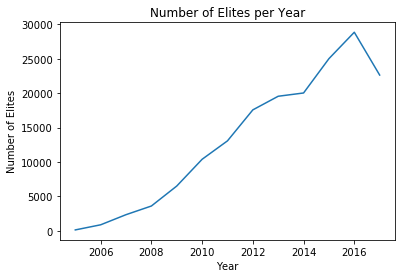

In [9]:
items = years_to_count.items()
sorted_items = sorted(items, key=lambda x:x[0], reverse=True)
years = [year for (year, count) in sorted_items]
counts = [count for (year, count) in sorted_items]
plt.plot(years, counts)
plt.title("Number of Elites per Year")
plt.xlabel("Year")
plt.ylabel("Number of Elites")
plt.show()

In [10]:
def generate_features(feature_order):
    features = []
    labels = []
    with open("yelp_academic_dataset_user.json") as f:
        for l in f:
            line = json.loads(l)
            elites = line["elite"]
            feature = [line[feat] for feat in feature_order]
            features.append(feature)
            if "None" in elites:
                labels.append(0)
            else:
                labels.append(1)
    return features, labels

def run_random_forests(features, labels):
    seventy_mark = seventy_percent(features)
    clf = RandomForestClassifier()
    clf.fit(features[:seventy_mark], labels[:seventy_mark])

    preds = clf.predict(features[seventy_mark:])
    acc = accuracy(labels[seventy_mark:], preds)
    return acc, clf.feature_importances_

def accuracy(actual, preds):
    correct = 0.0
    for ind, pred in enumerate(preds):
        if pred == actual[ind]:
            correct += 1
    return correct/len(actual)

def seventy_percent(features):
    return int(0.7*len(features))

In [62]:
which_features = ["useful", "compliment_photos", "compliment_list", "compliment_funny",
                  "funny", "compliment_note", "compliment_plain", "compliment_writer",
                  "compliment_cute", "compliment_more", "compliment_hot", "cool", 
                  "compliment_profile", "compliment_cool"]

features, labels = generate_features(which_features)
acc, importances = run_random_forests(features, labels)
print(acc)

for ind, importance in sorted(enumerate(importances), key=lambda x:x[1], reverse=True):
    print(which_features[ind], importance)

0.984376517825
('compliment_cool', 0.18676622755894515)
('compliment_writer', 0.16372422292787445)
('compliment_hot', 0.13942757852707108)
('compliment_plain', 0.094833603417634957)
('compliment_funny', 0.088749154313130463)
('compliment_note', 0.082644578844610739)
('useful', 0.066597136444913857)
('funny', 0.050377474253743927)
('cool', 0.045369345227106048)
('compliment_more', 0.028476188840253693)
('compliment_photos', 0.021809290952076822)
('compliment_cute', 0.012606810895258341)
('compliment_profile', 0.011961355450647122)
('compliment_list', 0.0066570323467332855)


In [63]:
which_features = ["useful", "compliment_photos", "compliment_list", "compliment_funny",
                  "funny", "compliment_note", "compliment_plain", "compliment_writer",
                  "compliment_cute", "compliment_more", "compliment_hot", "cool", 
                  "compliment_profile", "compliment_cool", "review_count"]

features, labels = generate_features(which_features)
acc, importances = run_random_forests(features, labels)
print(acc)

for ind, importance in sorted(enumerate(importances), key=lambda x:x[1], reverse=True):
    print(which_features[ind], importance)

0.986186575138
('review_count', 0.1615208795667003)
('compliment_funny', 0.13402746642692642)
('compliment_cool', 0.13175698062570687)
('compliment_plain', 0.12526551157330526)
('compliment_writer', 0.093620148218043736)
('compliment_note', 0.082495882986939564)
('compliment_hot', 0.050707628720241538)
('useful', 0.048718114683354165)
('compliment_photos', 0.048173132196111454)
('cool', 0.039191440800241908)
('funny', 0.03819395304242483)
('compliment_more', 0.02127452975531597)
('compliment_profile', 0.011056407581647469)
('compliment_cute', 0.0097927664707118771)
('compliment_list', 0.0042051573523286664)


Created the ML functionality for predicting if a user has been elite at any point or not in their entire yelping career. In the end, we get around 98-99% accuracy on if a user has ever been elite.

In [18]:
import numpy as np
import json
import matplotlib.pyplot as plt
import datetime as datetime
from sklearn.ensemble import RandomForestClassifier

In [16]:
with open("yelp_academic_dataset_review.json") as f:
    for l in f:
        line = json.loads(l)
        print(line.keys())
        break

[u'funny', u'user_id', u'review_id', u'text', u'business_id', u'stars', u'date', u'useful', u'type', u'cool']


In [12]:
user_to_reviews = {}
with open("yelp_academic_dataset_review.json") as f:
    for l in f:
        line = json.loads(l)
        user = line["user_id"]
        if user in user_to_reviews:
            user_to_reviews[user].append(line)
        else:
            user_to_reviews[user] = [line]

In [15]:
user_to_years = {}
with open("yelp_academic_dataset_user.json") as f:
    for l in f:
        line = json.loads(l)
        elites = line["elite"]
        if "None" not in elites:
            years = {int(yr) for yr in elites}
            user_to_years[line["user_id"]] = years

In [37]:
elite_years = set(years_to_count.keys())
features = []
labels = []

elite_avg_stars = []
elite_avg_cool = []
elite_avg_useful = []
elite_avg_funny = []
elite_avg_reviews = []

non_avg_stars = []
non_avg_cool = []
non_avg_useful = []
non_avg_funny = []
non_avg_reviews = []

for user, reviews in user_to_reviews.items():
    year_to_reviews = {}
    for line in reviews:
        date = datetime.datetime.strptime(line['date'], '%Y-%m-%d')
        year = int(date.strftime('%Y'))
        if year in elite_years:
            if year in year_to_reviews:
                year_to_reviews[year].append(line)
            else:
                year_to_reviews[year] = [line]
    
    elite_before = 0
    for year, reviews in sorted(year_to_reviews.items(), key=lambda x:x[0]):
        feat = []
        
        n_funny = 0.0
        n_cool = 0.0
        n_useful = 0.0
        n_stars = 0.0
        n_reviews = len(reviews)
        for review in reviews:
            n_funny += review["funny"]
            n_cool += review["cool"]
            n_useful += review["useful"]
            n_stars += review["stars"]
        feat.append(year)
        feat.append(elite_before)
        feat.append(n_reviews)
        feat.append(n_funny/n_reviews)
        feat.append(n_cool/n_reviews)
        feat.append(n_useful/n_reviews)
        feat.append(n_stars/n_reviews)
            
        features.append(feat)
        
        if user in user_to_years and year in user_to_years[user]:
            labels.append(1)
            elite_avg_stars.append(n_stars/n_reviews)
            elite_avg_cool.append(n_cool/n_reviews)
            elite_avg_useful.append(n_useful/n_reviews)
            elite_avg_funny.append(n_funny/n_reviews)
            elite_avg_reviews.append(n_reviews)
        else:
            labels.append(0)
            non_avg_stars.append(n_stars/n_reviews)
            non_avg_cool.append(n_cool/n_reviews)
            non_avg_useful.append(n_useful/n_reviews)
            non_avg_funny.append(n_funny/n_reviews)
            non_avg_reviews.append(n_reviews)
            
        elite_before = 1

In [38]:
which_features = ["year", "elite_before", "n_reviews", "n_funny", "n_cool", "n_useful", "avg_star"]

years = [x[0] for x in features]
indices = np.argsort(years)
s_features = [features[i] for i in indices]
s_labels = [labels[i] for i in indices]
acc, importances = run_random_forests(s_features, s_labels)

print(acc)
for ind, importance in sorted(enumerate(importances), key=lambda x:x[1], reverse=True):
    print(which_features[ind], importance)

0.963628954205
('n_useful', 0.18809293584906486)
('avg_star', 0.18539758015660451)
('n_cool', 0.17795776967990004)
('n_funny', 0.15927096801881366)
('n_reviews', 0.14202839509118728)
('year', 0.10850749696067201)
('elite_before', 0.038744854243757565)


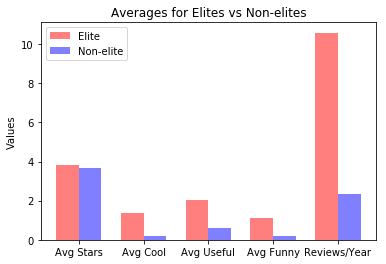

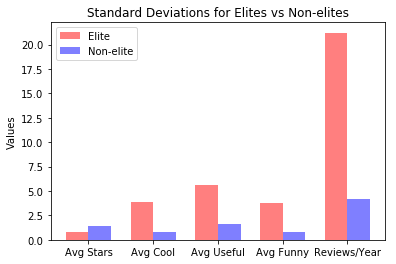

In [65]:
elite_avgs = (np.average(elite_avg_stars), np.average(elite_avg_cool), np.average(elite_avg_useful),
              np.average(elite_avg_funny), np.average(elite_avg_reviews))
non_avgs = (np.average(non_avg_stars), np.average(non_avg_cool), np.average(non_avg_useful),
              np.average(non_avg_funny), np.average(non_avg_reviews))

elite_stds = (np.std(elite_avg_stars), np.std(elite_avg_cool), np.std(elite_avg_useful),
              np.std(elite_avg_funny), np.std(elite_avg_reviews))
non_stds = (np.std(non_avg_stars), np.std(non_avg_cool), np.std(non_avg_useful),
              np.std(non_avg_funny), np.std(non_avg_reviews))

n_groups = 5

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.5
error_config = {'ecolor': '0.3'}

elite = plt.bar(index, elite_avgs, bar_width, alpha=opacity, color='r', label='Elite')
non = plt.bar(index + bar_width, non_avgs, bar_width, alpha=opacity, color='b', label='Non-elite')

# elite = plt.bar(index, elite_avgs, bar_width, alpha=opacity, color='r', 
#                 yerr=elite_stds, error_kw=error_config, label='Elite')
# non = plt.bar(index + bar_width, non_avgs, bar_width, alpha=opacity, color='b', 
#               yerr=non_stds, error_kw=error_config, label='Non-elite')

plt.ylabel('Values')
plt.title('Averages for Elites vs Non-elites')
plt.xticks(index + bar_width / 2, ('Avg Stars', 'Avg Cool', 'Avg Useful', 'Avg Funny', 'Reviews/Year'))
plt.legend()
plt.show()

fig, ax = plt.subplots()
error_config = {'ecolor': '0.3'}

elite = plt.bar(index, elite_stds, bar_width, alpha=opacity, color='r',
                 error_kw=error_config, label='Elite')
non = plt.bar(index + bar_width, non_stds, bar_width, alpha=opacity, color='b',
                 error_kw=error_config, label='Non-elite')

plt.ylabel('Values')
plt.title('Standard Deviations for Elites vs Non-elites')
plt.xticks(index + bar_width / 2, ('Avg Stars', 'Avg Cool', 'Avg Useful', 'Avg Funny', 'Reviews/Year'))
plt.legend()
plt.show()